In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
pd.set_option('precision', 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
muni_data = pd.read_csv("municipal_guatemala_2008-2011.zip", sep=";", low_memory=False,
                        compression='zip', error_bad_lines=False, warn_bad_lines=True)
muni_data.head()

,ANNO,ADMINISTRACIÓN,MUNICIPIO,DEPTO,MUN,FUNC1,FUNC2,FUNC3,ECON1,ECON2,...,ORIGEN2,ORIGEN3,PROGRAMA1,PROGRAMA2,PROYECTO1,PROYECTO2,APROBADO,RETRASADO,EJECUTADO,PAGADO
0,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,"Q.137,400.00","Q.137,400.00","Q.137,400.00"
1,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
2,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
3,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,"Q.240,000.00","Q.49,588.00","Q.49,588.00","Q.49,588.00"
4,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-


In [3]:
tipos = muni_data.columns.to_series().groupby(muni_data.dtypes).groups
tipos

{dtype('int64'): Index(['ANNO'], dtype='object'),
 dtype('O'): Index(['ADMINISTRACIÓN', 'MUNICIPIO', 'DEPTO', 'MUN', 'FUNC1', 'FUNC2',
        'FUNC3', 'ECON1', 'ECON2', 'ORIGEN1', 'ORIGEN2', 'ORIGEN3', 'PROGRAMA1',
        'PROGRAMA2', 'PROYECTO1', 'PROYECTO2', 'APROBADO', 'RETRASADO',
        'EJECUTADO', 'PAGADO'],
       dtype='object')}

In [5]:
muni_data.shape

(674135, 21)

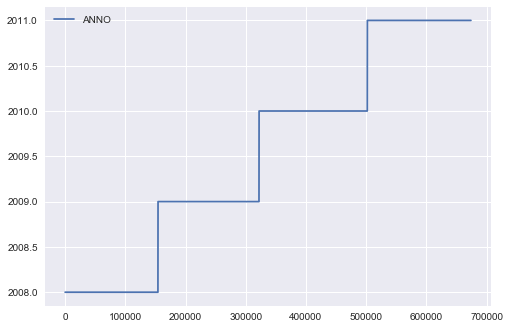

In [6]:
muni_data.plot()

In [19]:
def clean_q(input_object):
    import re
    preprate_input = str(input_object).replace(',', '')
    regex_clean = re.compile(r'(?<=Q\.)\d+(?=\.)')
    search_num = re.search(regex_clean, preprate_input)
    
    if input_object is NaN or not search_num:
        return 0
    
    return search_num.group(0)

In [20]:
data = ['Q.240,000.00', 'Q.-', 'Q.137,400.00', NaN]
clean = list(map(clean_q, data))
clean

['240000', 0, '137400', 0]